## COVID-19

Date: 2020, 31 Mar

Seminar for the graduate course in Modeling and Simulation of Physical Systems [FEMT16](https://nastava.fesb.unist.hr/nastava/predmeti/11623), taught by professors Dragan Poljak and Ivica Puljak. 

In [1]:
# libs
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime as dt

from covid_19.utils import normalize, restore, moving_average, train_test_split, RMSE
from covid_19.plotting import plotData, figsize, latexconfig
from covid_19.exponential_models import ExponentialModel, LogisticModel
from covid_19.compartmental_models import SIR, SEIR

from scipy.optimize import curve_fit

In [2]:
# data
confirmed_cases = np.loadtxt('data/cro/confirmed_cases.dat')
recovered_cases = np.loadtxt('data/cro/recovered_cases.dat')
death_cases = np.loadtxt('data/cro/death_cases.dat')
removed_cases = recovered_cases #+ death_cases

# train-test split 
ratio = 1.
train_confirmed_cases, test_confirmed_cases = train_test_split(confirmed_cases, ratio)
train_removed_cases, test_removed_cases = train_test_split(removed_cases, ratio)

# days since first case
x = np.arange(len(train_confirmed_cases))

In [38]:
seir = SEIR()
initial_conditions = [5000, 0, train_confirmed_cases[0], train_removed_cases[0]]
seir.fit(train_confirmed_cases, train_removed_cases, initial_conditions)
n_days = int(len(train_confirmed_cases) * 2.5)
sol = seir.predict(n_days)

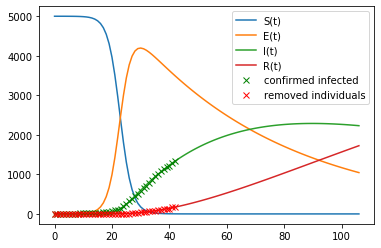

In [39]:
plt.plot(sol.y[0], label='S(t)')
plt.plot(sol.y[1], label='E(t)')
plt.plot(sol.y[2], label='I(t)')
plt.plot(sol.y[3], label='R(t)')
plt.plot(train_confirmed_cases, 'gx', label='confirmed infected')
plt.plot(train_removed_cases, 'rx', label='removed individuals')
plt.legend(loc='best')
plt.show()

/home/alk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/home/alk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/alk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


A = 1703.94
T = 34.73
n = 6.036
τ = 94674480.154


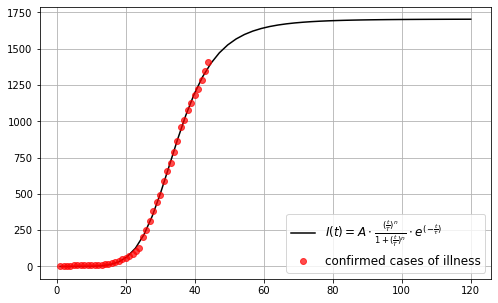

In [22]:
# ref: A Class of Analytical Functions to Study the Lightning Effects Associated With the Current Front

# analytical solution
def I(t, A, T, n, τ):
    return A * (t/T)**n/(1 + (t/T)**n) * np.exp(-t/τ)

# fit to data
x = np.arange(1, len(confirmed_cases)+1)
y_data = confirmed_cases

popt, pcov = curve_fit(I, x, y_data, maxfev=5000)
print(f'A = {np.round(popt[0], 3)}\n\
T = {np.round(popt[1], 3)}\n\
n = {np.round(popt[2], 3)}\n\
τ = {np.round(popt[3], 3)}')

fig = plt.figure(figsize=figsize(1.5, 1))
_x = np.linspace(1, 120)
plt.plot(_x, I(_x, *popt), color='black',
         label=r'$I(t) = A \cdot \frac{(\frac{t}{T})^n}{1 + (\frac{t}{T})^n} \cdot e^{(-\frac{t}{\tau})}$')
plt.plot(x, y_data, 'ro', alpha=0.7,label='confirmed cases of illness')
plt.legend(prop={'size': 12})
plt.grid()
plt.show()